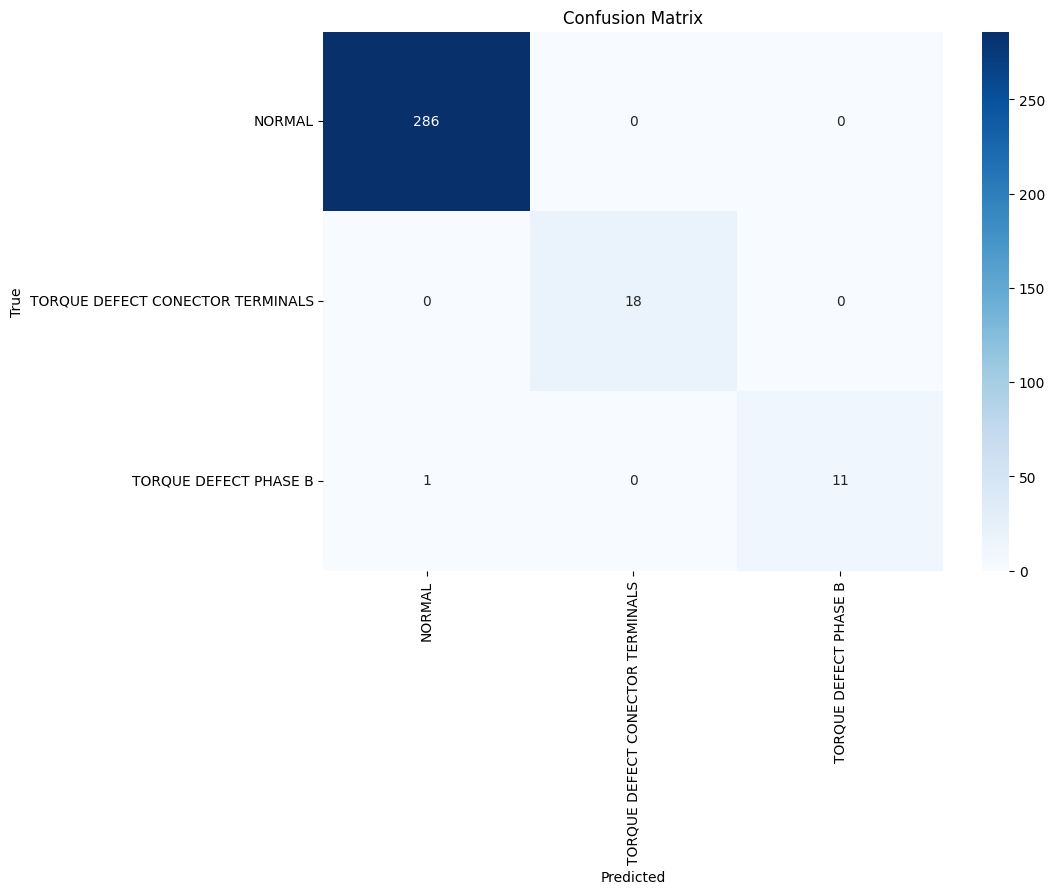

Accuracy: 0.9968354430379747


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/final_cleaned_capstone_classification_final.xlsx'  # Adjust the path as needed
data = pd.read_excel(file_path)

# Assume 'CLASSIFICATION' is the target and all other columns are features
# Preprocess the data: Handle missing values for numerical features
imputer = SimpleImputer(strategy='mean')
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols] = imputer.fit_transform(data[numerical_cols])

# Encode the classification column if it's categorical
encoder = LabelEncoder()
data['CLASSIFICATION'] = encoder.fit_transform(data['CLASSIFICATION'])

# Split the data into features (X) and target variable (y)
X = data.drop('CLASSIFICATION', axis=1)
y = data['CLASSIFICATION']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
